In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset weatherHistory.csv

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Get rid of non-numerical columns of the dataset

In [3]:
df.drop(['Formatted Date','Summary','Precip Type','Daily Summary'],axis=1, inplace=True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


### Use 'Temperature (C)' as your target variable. Plot the relationship of each of the numerical features with the target variable

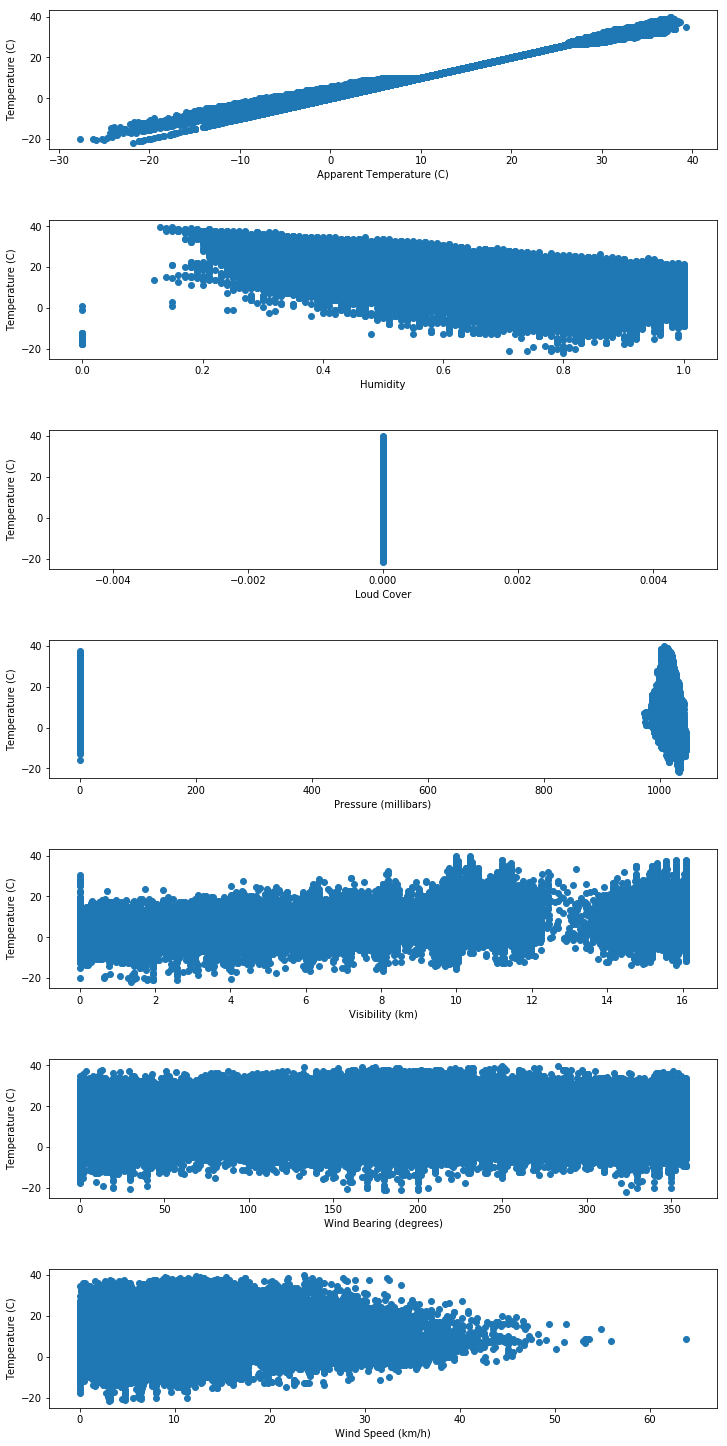

In [4]:
X = df[df.columns.difference(['Temperature (C)'])]
y = df['Temperature (C)']
fig, axis = plt.subplots(7, 1)
fig.set_figwidth(10)
fig.set_figheight(20)
fig.tight_layout(h_pad = 5)

for i, feature in enumerate(X.columns.tolist()):
    axis[i].scatter(df[feature], y)
    axis[i].set_xlabel(feature)
    axis[i].set_ylabel('Temperature (C)')

In [108]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


### Leave only one feature that has a linear relationship with the target variable.

In [6]:
df = df[['Temperature (C)','Humidity']]
df.head()

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


In [7]:
len(df['Temperature (C)']) , len(df['Humidity'])

(96453, 96453)

### Divide the dataset into training and test sets with the ratio 80:20.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Humidity'],df['Temperature (C)'] , test_size=0.2, random_state=50)

In [9]:
np.ones(len(X_train)).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [10]:
len(X_train) , len(y_train) , type(X_train) , type(y_train)

(77162, 77162, pandas.core.series.Series, pandas.core.series.Series)

### Implement a function fit_ridge_regression

In [11]:
def fit_ridge_regression(data_vector, response_vector, l=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """
    x = np.array(data_vector).reshape(-1,1)
    x = np.append(x, np.ones(len(X_train)).reshape(-1,1), axis=1)
    y = np.array(response_vector).reshape(-1,1)
    data_vector = np.array(data_vector)
    
    #beta = np.linalg.inv(data_vector.T.dot(data_vector)).dot(data_vector.T).dot(response_vector)
    beta = np.linalg.inv(x.T.dot(x)+ l*np.identity(len(x.T.dot(x)))).dot(x.T).dot(y)
    
    #TODO
    
    return beta

fit_ridge_regression(X_train, y_train)

array([[-30.88445515],
       [ 34.648009  ]])

### Implement a function fit_polynomial_regression

In [12]:
def fit_polynomial_regression(data_vector, response_vector, degree=2):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    x = np.ones(len(data_vector)).reshape(-1,1)
    x = np.c_[x, data_vector] 
    
    y = np.array(response_vector).reshape(-1,1)
    
    for i in range(2,degree+1):
        a = np.ones(len(x))
        for r in range(len(x)):
            a[r] = x[r][1]**i
            #print(x[r][1]**i)
        x = np.c_[x,a]
    
    #TODO
    
    beta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    
    
    return beta

fit_polynomial_regression(X_train,y_train)

array([[ 40.05924106],
       [-48.87403489],
       [ 13.5055855 ]])

In [13]:
fit_polynomial_regression(X_train,y_train,degree=3)

array([[  22.96018755],
       [  44.71262002],
       [-141.9418777 ],
       [  80.3173938 ]])

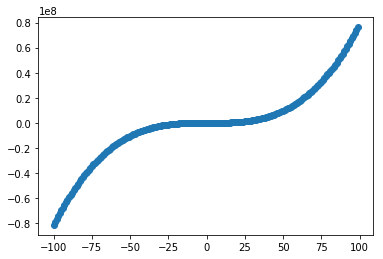

In [169]:
x = range(-100,100,1)
y = [22+44*i - 141*i**2 + 80*i**3 for i in x]
plt.scatter(x,y)
plt.show() # xoranard funkica funkciai grafik

### Use the resulting train and test sets with the previous 2 functions to fit ridge regression and polynomial regression lines.

In [22]:
print(fit_ridge_regression(X_train,y_train) ,'\n\n\n' , fit_polynomial_regression(X_train,y_train,degree=3))

[[-30.88445515]
 [ 34.648009  ]] 


 [[  22.96018755]
 [  44.71262002]
 [-141.9418777 ]
 [  80.3173938 ]]


### Calculate RMSE (root mean squared error) for ridge and polynomial regressions

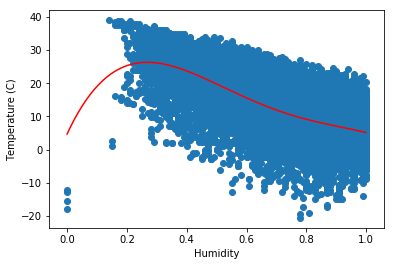

In [37]:
plt.scatter(X_test,y_test)
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
curve_x = np.arange(0,1,0.001)
beta = fit_polynomial_regression(X_train,y_train,degree=4)
curve_y = [sum(beta[i] * x ** i for i in range(len(beta))) for x in curve_x]
plt.plot(curve_x, curve_y, color='red')


plt.show()

### Now fit the ridge and polynomial regressions to your data using sklearn and compare the results with your own fit_1d_linear_regression function. Use RMSE for comparison.

In [69]:
from sklearn.metrics import mean_squared_error

In [72]:
from sklearn.linear_model import Ridge
degree = 4

poly_features = PolynomialFeatures(degree=degree)
  

X_train_poly = poly_features.fit_transform(np.array(X_train).reshape(-1, 1))

clf = Ridge(alpha=1.5)
clf.fit(X_train_poly, y_train)


y_train_predicted = clf.predict(X_train_poly)
y_test_predict = clf.predict(poly_features.fit_transform(np.array(X_test).reshape(-1, 1)))

print("Rmse train:" , np.sqrt(mean_squared_error(y_train, y_train_predicted)))

Rmse train: 7.346881368506577


### Use any additional visualizations that may help during your analysis.

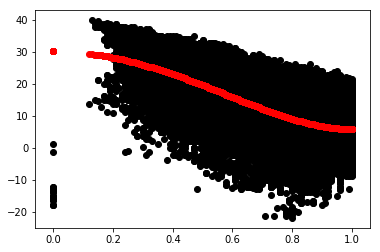

In [77]:
plt.scatter(X_train,y_train,c='k')
plt.scatter(X_train,y_train_predicted,c='r')



plt.show()